<a href="https://colab.research.google.com/github/Kishankumar1328/tensorflow/blob/main/Diabetes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [5]:
df=pd.read_csv(r"/content/diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
x = df.drop(columns=["Outcome", "DiabetesPedigreeFunction", "BMI"])
y = df["Outcome"]


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [43]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu',),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu")
])

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [46]:
dh=model.fit(x_train,y_train,epochs=700,batch_size=29,validation_split=0.13,verbose="auto")

Epoch 1/700
19/19 [==============================] - 2s 32ms/step - loss: 1.7098 - accuracy: 0.0936 - val_loss: 1.6341 - val_accuracy: 0.0375
Epoch 2/700
19/19 [==============================] - 0s 18ms/step - loss: 1.2538 - accuracy: 0.0524 - val_loss: 1.3539 - val_accuracy: 0.0250
Epoch 3/700
19/19 [==============================] - 0s 17ms/step - loss: 1.1243 - accuracy: 0.0337 - val_loss: 1.1632 - val_accuracy: 0.0000e+00
Epoch 4/700
19/19 [==============================] - 0s 9ms/step - loss: 0.9034 - accuracy: 0.0112 - val_loss: 0.9363 - val_accuracy: 0.0125
Epoch 5/700
19/19 [==============================] - 0s 4ms/step - loss: 0.8169 - accuracy: 0.0169 - val_loss: 0.9246 - val_accuracy: 0.0250
Epoch 6/700
19/19 [==============================] - 0s 4ms/step - loss: 0.8123 - accuracy: 0.0169 - val_loss: 0.8998 - val_accuracy: 0.0250
Epoch 7/700
19/19 [==============================] - 0s 4ms/step - loss: 0.7893 - accuracy: 0.0262 - val_loss: 0.9001 - val_accuracy: 0.0500
Epoch 

In [72]:
y_pred_prob=model.predict(x_test)
y_pred=(y_pred_prob>0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


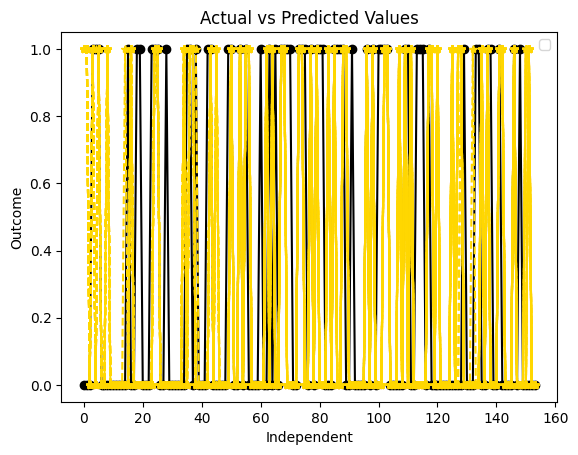

In [73]:
y_pred = np.array(y_pred)
plt.plot(range(len(y_test)), y_test, color='black', marker='o')
plt.plot(range(len(y_test)), y_pred, color='gold', linestyle='dashed', marker='*')
plt.title('Actual vs Predicted Values')
plt.xlabel('Independent')
plt.ylabel('Outcome')
plt.legend()
plt.show()